In [3]:
import numpy as np
import pandas as pd


In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 7.1 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/8.1 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 5.6 MB/s eta 0:00:01
   -----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt

In [5]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import seaborn as sns

e:\Langchain\lang-venv\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


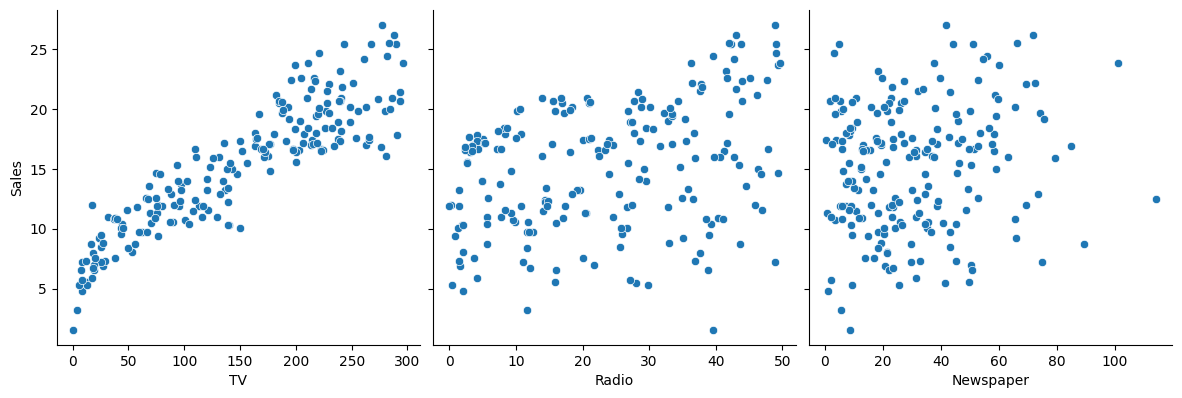

In [11]:
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=4, kind='scatter')
plt.show()

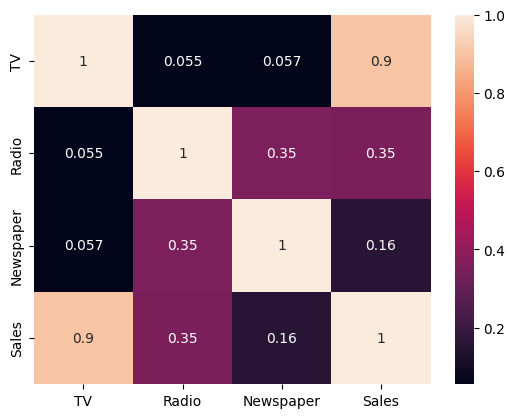

In [13]:
sns.heatmap(advertising.corr(),annot= True)
plt.show()

In [14]:
x= advertising['TV']
y= advertising['Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [20]:
pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.6 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.6 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.6 MB 3.2 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.6 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.6 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 3.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.6 MB 3.6 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import statsmodels.api as sm

In [22]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()

In [23]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           1.52e-52
Time:                        16:12:04   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [26]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [27]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R-squared : ", r2_score(y_test,y_pred))

RMSE :  2.019296008966232
R-squared :  0.792103160124566
